### Business Understanding

The aim of this challenge is to predict whether the customer will be interested in buying insurance.

### Data Mining

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv("train.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.shape

(381109, 12)

### Data Cleaning

In [4]:
# Check missing info

data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No missing information in our train data.

In [5]:
# full data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


If any missing info present in the data, then we can apply 'fillna', 'dropna', 'replace'.

- data.fillna()
- data.dropna()
- data.replace()


### EDA (Exploratory Data Analysis)

In [6]:
# display columns

data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
# display how many male/female customers available

data["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [8]:
# know data types

data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [9]:
# display how many customers have driving license

data["Driving_License"].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [10]:
# display how many vehicles by age

data["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [11]:
# display  how many vehicles are damaged

data["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [12]:
# display age min

data["Age"].min()

20

In [13]:
# display age max

data["Age"].max()

85

In [14]:
# display customers with age min

data[data["Age"] == data["Age"].min()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
55,56,Female,20,1,47.0,0,< 1 Year,Yes,25380.0,160.0,171,0
61,62,Female,20,1,50.0,0,< 1 Year,Yes,36615.0,160.0,218,0
89,90,Female,20,1,36.0,0,< 1 Year,Yes,46275.0,160.0,281,1
102,103,Female,20,1,30.0,0,< 1 Year,Yes,33227.0,160.0,78,0
147,148,Male,20,1,39.0,1,< 1 Year,No,28329.0,160.0,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380794,380795,Female,20,1,47.0,0,< 1 Year,Yes,23823.0,160.0,142,0
380797,380798,Male,20,1,46.0,0,< 1 Year,Yes,48366.0,160.0,199,0
380876,380877,Male,20,1,24.0,1,< 1 Year,No,2630.0,160.0,99,0
381002,381003,Female,20,1,28.0,0,1-2 Year,Yes,38627.0,124.0,62,0


In [15]:
# display customers with age max

data[data["Age"] == data["Age"].max()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
48875,48876,Female,85,1,45.0,1,1-2 Year,No,2630.0,26.0,102,0
100683,100684,Female,85,1,28.0,0,1-2 Year,Yes,32366.0,26.0,293,0
109851,109852,Female,85,1,50.0,0,1-2 Year,Yes,26475.0,124.0,114,0
137703,137704,Female,85,1,28.0,0,1-2 Year,Yes,51045.0,124.0,147,0
150129,150130,Male,85,1,48.0,0,1-2 Year,Yes,2630.0,124.0,37,0
181135,181136,Male,85,1,28.0,0,1-2 Year,Yes,34005.0,122.0,279,0
208264,208265,Female,85,1,8.0,0,1-2 Year,Yes,65268.0,124.0,245,0
210249,210250,Female,85,1,28.0,1,1-2 Year,No,42530.0,26.0,64,0
213099,213100,Female,85,1,28.0,0,1-2 Year,Yes,2630.0,26.0,290,0
229103,229104,Female,85,0,28.0,1,1-2 Year,No,27057.0,26.0,65,0


In [16]:
# display customers that are less than 30 and greater than 20

data[(data["Age"] >= 20)&(data["Age"] <= 30)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381093,381094,Female,22,1,28.0,1,< 1 Year,No,59216.0,152.0,279,0
381100,381101,Female,29,1,28.0,0,< 1 Year,Yes,49007.0,124.0,137,0
381102,381103,Female,25,1,41.0,1,< 1 Year,Yes,2630.0,152.0,102,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0


In [17]:
# display customers that are less than 40 and greater than 31

data[(data["Age"] >= 31) & (data["Age"] <= 40)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0
15,16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
24,25,Male,34,1,15.0,1,1-2 Year,No,38111.0,152.0,180,0
34,35,Female,32,1,30.0,1,< 1 Year,No,27638.0,152.0,169,0
43,44,Female,38,1,35.0,1,1-2 Year,No,2630.0,152.0,153,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381083,381084,Female,35,1,35.0,1,1-2 Year,No,28892.0,152.0,199,0
381085,381086,Male,39,1,28.0,0,1-2 Year,Yes,30374.0,163.0,212,0
381086,381087,Female,34,1,35.0,0,1-2 Year,Yes,2630.0,152.0,208,0
381092,381093,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,130,0


In [18]:
# display customers that are less than 50 and greater than 41

data[(data["Age"] >= 41) & (data["Age"] <= 50)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
10,11,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1
12,13,Female,41,1,15.0,1,1-2 Year,No,31409.0,14.0,221,0
18,19,Male,42,1,28.0,0,1-2 Year,Yes,33667.0,124.0,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381090,381091,Male,47,1,35.0,1,1-2 Year,No,37589.0,124.0,144,0
381094,381095,Female,47,1,20.0,0,1-2 Year,Yes,2630.0,26.0,84,0
381096,381097,Female,49,1,10.0,0,1-2 Year,Yes,34541.0,26.0,44,0
381103,381104,Male,47,1,50.0,0,1-2 Year,Yes,39831.0,26.0,235,0


In [19]:
# display customers that are less than 60 and greater than 51

data[(data["Age"] >= 51) & (data["Age"] <= 60)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
19,20,Female,60,1,33.0,0,1-2 Year,Yes,32363.0,124.0,102,1
26,27,Female,51,1,28.0,0,1-2 Year,Yes,38341.0,124.0,49,1
29,30,Male,57,1,11.0,0,1-2 Year,Yes,25679.0,157.0,232,1
41,42,Female,54,1,28.0,0,1-2 Year,No,38560.0,122.0,184,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381060,381061,Male,57,1,33.0,1,1-2 Year,No,38915.0,124.0,30,0
381071,381072,Male,53,1,8.0,0,1-2 Year,Yes,31732.0,124.0,185,0
381078,381079,Female,58,1,28.0,0,1-2 Year,Yes,39740.0,26.0,170,0
381095,381096,Male,52,1,28.0,0,1-2 Year,Yes,38323.0,124.0,69,0


In [20]:
# display customers that are less than 70 and greater than 61

data[(data["Age"] >= 61) & (data["Age"] <= 70)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
20,21,Male,65,1,28.0,0,1-2 Year,Yes,41184.0,124.0,116,0
58,59,Female,62,1,48.0,0,1-2 Year,Yes,2630.0,15.0,295,0
62,63,Female,62,1,28.0,0,> 2 Years,Yes,33830.0,26.0,130,0
68,69,Male,63,1,28.0,1,1-2 Year,No,61739.0,124.0,79,0
76,77,Male,67,1,28.0,1,1-2 Year,No,31993.0,122.0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381065,381066,Female,64,1,28.0,0,> 2 Years,Yes,58713.0,163.0,108,0
381075,381076,Female,61,1,28.0,0,1-2 Year,Yes,43875.0,26.0,139,1
381098,381099,Female,68,1,33.0,0,> 2 Years,Yes,36326.0,26.0,196,0
381101,381102,Female,70,1,28.0,0,> 2 Years,Yes,50904.0,122.0,215,0


In [21]:
# display customers that are less than 85 and greater than 71

data[(data["Age"] >= 71) & (data["Age"] <= 85)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
13,14,Male,76,1,28.0,0,1-2 Year,Yes,36770.0,13.0,15,0
14,15,Male,71,1,28.0,1,1-2 Year,No,46818.0,30.0,58,0
31,32,Male,79,1,28.0,0,1-2 Year,Yes,57444.0,26.0,222,0
36,37,Male,71,1,8.0,1,1-2 Year,No,40903.0,19.0,253,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381056,381057,Female,72,1,28.0,0,1-2 Year,Yes,42612.0,26.0,213,0
381081,381082,Female,75,1,28.0,1,1-2 Year,No,51619.0,26.0,80,0
381082,381083,Female,74,1,50.0,1,1-2 Year,No,35594.0,8.0,47,0
381091,381092,Male,71,1,28.0,1,1-2 Year,No,43369.0,26.0,43,0


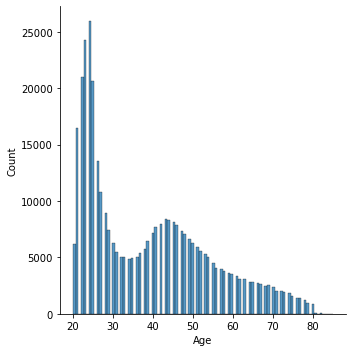

In [22]:
# seaborn distribution plot

sns.displot(data["Age"]);

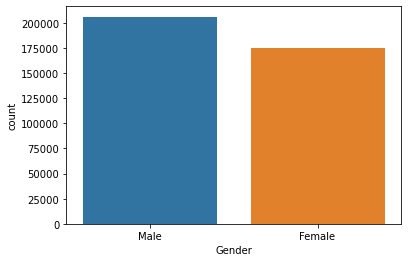

In [23]:
sns.countplot(x=data['Gender']);

### Feature Engineering

In [24]:
# Encoding columns (categorical data to numbers) from train data

data["Gender"].replace(data["Gender"].value_counts().index, [0, 1], inplace=True)
data["Vehicle_Age"].replace(data["Vehicle_Age"].value_counts().index, [0, 1, 2], inplace=True)
data["Vehicle_Damage"].replace(data["Vehicle_Damage"].value_counts().index, [0, 1], inplace=True)


In [25]:
# display train data

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,0,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,0,1,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,0,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,1,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,1,1,27496.0,152.0,39,0


In [26]:
# Features and target labels (X, y)

X = data.loc[:, data.columns != 'Response']
y = data['Response']


In [27]:
# load test data

test_data = pd.read_csv("test.csv")
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [28]:
# Encoding columns (categorical data to numbers) from test data

test_data["Gender"].replace(test_data["Gender"].value_counts().index, [0, 1], inplace=True)
test_data["Vehicle_Age"].replace(test_data["Vehicle_Age"].value_counts().index, [0, 1, 2], inplace=True)
test_data["Vehicle_Damage"].replace(test_data["Vehicle_Damage"].value_counts().index, [0, 1], inplace=True)

In [29]:
# display test data

test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,0,25,1,11.0,1,1,1,35786.0,152.0,53
1,381111,0,40,1,28.0,0,0,0,33762.0,7.0,111
2,381112,0,47,1,28.0,0,0,0,40050.0,124.0,199
3,381113,0,24,1,27.0,1,1,0,37356.0,152.0,187
4,381114,0,27,1,28.0,1,1,1,59097.0,152.0,297


### Predictive Modeling

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
# train and test Split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [32]:
# fitting the model

model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [33]:
# Predict on test data

predict_model = model.predict(test_data)

In [34]:
# accuracy

print(predict_model.shape,test_y.shape)

np.random.shuffle(predict_model)
pred_y = predict_model[:76222]
accuracy = accuracy_score(pred_y, test_y)
print(np.round(accuracy*100,2),end="%")

(127037,) (76222,)
87.71%

In [35]:
# Output

output = pd.DataFrame({"id": test_data["id"], "Response": predict_model})
output.to_csv("output.csv", index=False)